# 로지스틱 회귀

- 의의
    - 확률을 예측하는데에 사용되는 통계 모델
        - 특정 결과의 확률을 계산
    - 결과값은 이진이어야함(결과는 둘 중 하나)
        - 원하는 결과는 1, 원하지 않는 결과는 0
    - 선형 회귀와 마찬가지로 다중공선성은 거의 없어야 함
        - 독립변수는 서로 독립적이어야 함
    - 종속변수와 관련 없는 독립변수를 제거할 때 더 효율적인 경향이 있음
- 장점
    - 많은 양의 연산 자원을 필요로 하지 않음
    - 쉽게 해석할 수 있음
- 단점
    - 비선형 데이터에 사용하기 힘듦
    - 과적합에 취약함
    - 1과 0으로만 결과가 출력되기 때문에 범주형 결과를 예측하는데에만 사용가능

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, softmax

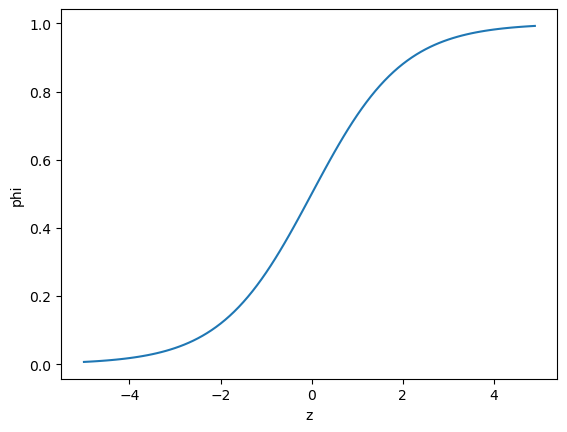

In [3]:
# 로지스틱 함수(=시그모이드 함수) 시각화
z = np.arange(-5, 5, 0.1)
# 로지스틱 함수 식
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

In [6]:
df = pd.read_csv("./data/Fish.csv")

In [8]:
df_bs = df[(df["Species"].isin(["Bream", "Smelt"]))]

In [10]:
df_bs.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [12]:
df_bs.shape

(49, 7)

In [14]:
# Length1 삭제
df_bs = df_bs.drop("Length1", axis = 1)

In [16]:
df_bs.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [18]:
x = df_bs.drop("Species", axis = 1)
y = df_bs["Species"]

In [20]:
# 75 : 25 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 26)

In [22]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

## 모델 훈련

In [25]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [27]:
# test data에 대한 예측
logi.predict(scaled_test)

array(['Bream', 'Bream', 'Bream', 'Smelt', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [29]:
# 예측 확률 출력 [도미, 빙어]
logi.predict_proba(scaled_test)

array([[0.90804325, 0.09195675],
       [0.96957412, 0.03042588],
       [0.95348546, 0.04651454],
       [0.02292033, 0.97707967],
       [0.03225314, 0.96774686],
       [0.99525805, 0.00474195],
       [0.02734957, 0.97265043],
       [0.04104716, 0.95895284],
       [0.99862585, 0.00137415],
       [0.8282424 , 0.1717576 ],
       [0.88577569, 0.11422431],
       [0.97134194, 0.02865806],
       [0.98991588, 0.01008412]])

In [31]:
# 종속변수 값 확인
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

In [33]:
# 로지스틱 회귀 회귀식 확인
logi.coef_, logi.intercept_

(array([[-0.62908294, -0.7688014 , -0.79029437, -0.80450965, -0.74886043]]),
 array([-2.54215838]))

In [35]:
x_train.columns

Index(['Weight', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

- z = Weight * -0.62 + Length2 * -0.76 + Length3 * -0.79 + Height * -0.8 + Width * -0.74 + (-2.54)

### 회귀식을 통한 확률값 계산

In [39]:
# z값 계산
scaled_test[0]

array([-0.42533364, -0.1403064 , -0.08178733,  0.07758921,  0.16754518])

In [41]:
-0.42 * -0.62 + (-0.14) * -0.76 + (-0.08) * -0.79 + 0.07 * -0.8 + 0.16 * -0.74 -2.54

-2.2844

In [43]:
decision_z = logi.decision_function(scaled_test[:5])
decision_z

array([-2.28997365, -3.46156319, -3.02035933,  3.75254384,  3.40135517])

In [45]:
# z값을 시그모이드 함수를 통과시켜 확률값 계산
expit(decision_z)

array([0.09195675, 0.03042588, 0.04651454, 0.97707967, 0.96774686])

# 로지스틱 회귀로 다중 분류

In [48]:
df = df.drop("Length1", axis = 1)

In [50]:
df.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [52]:
df.shape

(159, 6)

In [54]:
# 종속변수 확인
df["Species"].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [56]:
x = df.drop("Species", axis = 1)
y = df["Species"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 26)

In [60]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [62]:
# 로지스틱 회귀 모델 훈련
logi = LogisticRegression()
logi.fit(scaled_train, y_train)
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.8151260504201681
0.85


In [64]:
# test data에 대한 예측
logi.predict(scaled_test)

array(['Perch', 'Bream', 'Pike', 'Pike', 'Perch', 'Bream', 'Smelt',
       'Perch', 'Perch', 'Smelt', 'Bream', 'Perch', 'Parkki', 'Smelt',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Pike', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Bream',
       'Bream', 'Parkki', 'Pike', 'Perch', 'Perch', 'Bream', 'Bream',
       'Parkki', 'Perch', 'Smelt', 'Perch', 'Perch'], dtype=object)

In [66]:
# test data에 대한 예측 확률 확인
proba = logi.predict_proba(scaled_test)
print(np.round(proba, decimals = 3))

[[0.003 0.078 0.577 0.007 0.256 0.063 0.016]
 [0.513 0.27  0.06  0.011 0.098 0.    0.047]
 [0.009 0.014 0.238 0.562 0.147 0.007 0.024]
 [0.005 0.    0.061 0.914 0.009 0.    0.011]
 [0.025 0.    0.853 0.017 0.005 0.    0.1  ]
 [0.765 0.087 0.056 0.006 0.029 0.    0.057]
 [0.    0.024 0.107 0.001 0.058 0.81  0.001]
 [0.014 0.112 0.467 0.031 0.314 0.029 0.032]
 [0.004 0.049 0.66  0.011 0.233 0.02  0.023]
 [0.    0.028 0.105 0.001 0.061 0.804 0.001]
 [0.8   0.081 0.023 0.016 0.04  0.    0.04 ]
 [0.02  0.09  0.592 0.025 0.221 0.011 0.042]
 [0.008 0.356 0.2   0.003 0.254 0.167 0.011]
 [0.    0.04  0.127 0.001 0.086 0.745 0.001]
 [0.004 0.058 0.62  0.012 0.258 0.025 0.023]
 [0.516 0.109 0.172 0.019 0.084 0.    0.1  ]
 [0.363 0.331 0.087 0.016 0.153 0.001 0.049]
 [0.008 0.03  0.702 0.028 0.19  0.004 0.037]
 [0.067 0.001 0.753 0.036 0.006 0.    0.137]
 [0.003 0.    0.05  0.935 0.002 0.    0.01 ]
 [0.04  0.069 0.569 0.044 0.211 0.003 0.064]
 [0.005 0.054 0.616 0.018 0.258 0.024 0.024]
 [0.099 0.

In [68]:
# 종속변수 확인
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [70]:
# 회귀식 확인
logi.coef_

array([[ 0.05877873,  0.01562219,  0.69807034,  2.85510498, -0.31387147],
       [-0.48731066, -0.68056718, -0.63679093,  1.91203212, -0.70619899],
       [ 1.20020293,  0.2899595 , -1.40059462, -1.76853091,  1.62919262],
       [-0.06357223,  1.72959572,  1.7313491 , -1.2627758 , -0.57310946],
       [-0.8970852 , -0.59302522,  0.27676377, -0.40917778,  0.55354201],
       [-0.38181641, -0.71099101, -0.69668469, -1.32221282, -1.64701691],
       [ 0.57080283, -0.05059399,  0.02788703, -0.00443979,  1.05746219]])

In [72]:
# y 절편
logi.intercept_

array([ 0.26882243,  0.03222666,  2.27854232, -0.02070776,  0.83203303,
       -3.74712614,  0.35620947])

- 현재의 로지스틱 다중분류에서 독립변수는 5개를 사용하기 때문에 coef_ 배열의 열은 5개임
- 종속변수의 범주 수가 7개이기 때문에 coef_ 배열의 행과 intercept의 행은 7개임
  - 즉, 로지스틱 다중분류는 각 클래스마다 z값을 계산함
  - 이때 확률 값은 각각의 z값을 합이 1이 되도록 압축하기 위해 소프트맥스 함수(softmax)를 사용

### 회귀식을 통한 확률값 계산

In [76]:
decision_z = logi.decision_function(scaled_test)
np.round(decision_z, decimals = 2)

array([[ -2.77,   0.64,   2.64,  -1.78,   1.82,   0.42,  -0.97],
       [  2.52,   1.88,   0.38,  -1.34,   0.87,  -4.43,   0.13],
       [ -1.6 ,  -1.2 ,   1.66,   2.52,   1.18,  -1.92,  -0.63],
       [ -0.28,  -2.79,   2.27,   4.98,   0.33,  -5.06,   0.55],
       [  1.76,  -2.31,   5.3 ,   1.41,   0.07,  -9.39,   3.16],
       [  3.68,   1.51,   1.07,  -1.16,   0.4 ,  -6.59,   1.09],
       [ -5.15,   1.03,   2.54,  -2.56,   1.92,   4.56,  -2.35],
       [ -1.57,   0.5 ,   1.93,  -0.8 ,   1.53,  -0.85,  -0.74],
       [ -2.35,   0.23,   2.83,  -1.29,   1.79,  -0.67,  -0.54],
       [ -4.99,   1.13,   2.45,  -2.65,   1.91,   4.49,  -2.34],
       [  3.69,   1.4 ,   0.15,  -0.19,   0.7 ,  -6.45,   0.7 ],
       [ -1.11,   0.41,   2.3 ,  -0.85,   1.31,  -1.71,  -0.35],
       [ -1.84,   1.93,   1.36,  -2.71,   1.6 ,   1.18,  -1.52],
       [ -4.59,   1.05,   2.22,  -2.23,   1.82,   3.99,  -2.26],
       [ -2.33,   0.3 ,   2.67,  -1.25,   1.79,  -0.54,  -0.64],
       [  2.53,   0.98,  

In [78]:
proba = softmax(decision_z, axis = 1)    # axis = 1 : 각 행에 대해서 소프트맥스 계산
np.round(proba, decimals = 3)

array([[0.003, 0.078, 0.577, 0.007, 0.256, 0.063, 0.016],
       [0.513, 0.27 , 0.06 , 0.011, 0.098, 0.   , 0.047],
       [0.009, 0.014, 0.238, 0.562, 0.147, 0.007, 0.024],
       [0.005, 0.   , 0.061, 0.914, 0.009, 0.   , 0.011],
       [0.025, 0.   , 0.853, 0.017, 0.005, 0.   , 0.1  ],
       [0.765, 0.087, 0.056, 0.006, 0.029, 0.   , 0.057],
       [0.   , 0.024, 0.107, 0.001, 0.058, 0.81 , 0.001],
       [0.014, 0.112, 0.467, 0.031, 0.314, 0.029, 0.032],
       [0.004, 0.049, 0.66 , 0.011, 0.233, 0.02 , 0.023],
       [0.   , 0.028, 0.105, 0.001, 0.061, 0.804, 0.001],
       [0.8  , 0.081, 0.023, 0.016, 0.04 , 0.   , 0.04 ],
       [0.02 , 0.09 , 0.592, 0.025, 0.221, 0.011, 0.042],
       [0.008, 0.356, 0.2  , 0.003, 0.254, 0.167, 0.011],
       [0.   , 0.04 , 0.127, 0.001, 0.086, 0.745, 0.001],
       [0.004, 0.058, 0.62 , 0.012, 0.258, 0.025, 0.023],
       [0.516, 0.109, 0.172, 0.019, 0.084, 0.   , 0.1  ],
       [0.363, 0.331, 0.087, 0.016, 0.153, 0.001, 0.049],
       [0.008,

# 정리

- 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용
- 방정식의 값을 0 ~ 1 사이로 압축
    - 해당 값을 0 ~ 100% 사이의 확률로 이해할 수 있음
- 이진 분류
    1. 하나의 선형 방정식을 훈련
    2. 출력값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만듦
    3. 2번의 출력값이 양성 클래스에 대한 확률
- 다중 분류
    1. 클래스 개수만큼 방정식을 훈련
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산
    3. 2번의 출력값이 각 클래스에 대한 확률값